<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reaction-plane/Participant-eccentricity-v.s-N_part" data-toc-modified-id="Reaction-plane/Participant-eccentricity-v.s-N_part-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reaction-plane/Participant eccentricity v.s N_part</a></span></li></ul></div>

In [27]:
import numpy as np
import pandas as pd
import pickle
import ROOT
import tdrstyle as tdr
import os
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from array import array as ary
import math
import pickle
from skhep.visual import MplPlotter as skh_plt

ROOT.gStyle.SetOptStat(0)

%jsroot off

tdr.setTDRStyle()

In [6]:
data_dir = './collision-data/EventTree/'
os.makedirs('./plots', exist_ok=True)
os.makedirs('./plots/plot-analysis', exist_ok=True)
os.makedirs('./plots/plot-analysis/eps-vs-Npart', exist_ok=True)

## Reaction-plane/Participant eccentricity v.s N_part

In [7]:
dic_histmax={'Si-Si':60,
       'S-S':65,
       'Ca-Ca':80,
       'Ni-Ni':120,
       'Cu-Cu':125,
       'Au-Au':400,
       'Pb-Pb':420}

In [21]:
def make_profile(tree,system,XSNN):
    
    hM_Npart_epsPart = ROOT.TH2F('hM_Npart_epsPart', '', 42, 0, 420, 25, 0, 1)
    hM_Npart_epsRP = ROOT.TH2F('hM_Npart_epsRP', '', 42, 0, 420, 50, -1, 1)
    
    print (system,XSNN)
    
    ROOT.gStyle.SetPalette(87)

    c = ROOT.TCanvas('c', 'c', 600, 500)
    c.cd()
    ROOT.gPad.SetRightMargin(0.17)
    ROOT.gPad.SetLeftMargin(0.15)
    ROOT.gPad.SetBottomMargin(0.12)
    ROOT.gPad.SetTopMargin(0.06)
    tree.Draw('eps_RP:Npart>>hM_Npart_epsRP', '', 'colz')
    hM_Npart_epsRP.SetContour(1000)
    hM_Npart_epsRP.GetXaxis().SetTitle('N_{part}')
    hM_Npart_epsRP.GetYaxis().SetTitle('#epsilon_{RP}')
    # Set profile
    hM_profile_RP = ROOT.TProfile()
    hM_profile_RP = hM_Npart_epsRP.ProfileX('ProfileX-eps_RP-'+system+'-'+XSNN+'-mb')
    hM_profile_RP.SetMarkerColor(1)
    hM_profile_RP.Draw('same')
    c.SaveAs('./plots/plot-analysis/eps-vs-Npart/eps_RP-vs-Npart-' +
             system + '-XSNN' + XSNN + 'mb.png')
    c.SaveAs('./plots/plot-analysis/eps-vs-Npart/eps_RP-vs-Npart-' +
             system + '-XSNN' + XSNN + 'mb.pdf')
    
    c.cd()
    ROOT.gPad.SetRightMargin(0.17)
    ROOT.gPad.SetLeftMargin(0.15)
    ROOT.gPad.SetBottomMargin(0.12)
    ROOT.gPad.SetTopMargin(0.06)
    tree.Draw('eps_part:Npart>>hM_Npart_epsPart', '', 'colz')
    hM_Npart_epsPart.SetContour(1000)
    hM_Npart_epsPart.GetXaxis().SetTitle('N_{part}')
    hM_Npart_epsPart.GetYaxis().SetTitle('#epsilon_{Part}')
    # Set profile
    hM_profile_part = ROOT.TProfile()
    hM_profile_part = hM_Npart_epsPart.ProfileX('ProfileX-eps_part-'+system+'-'+XSNN+'-mb')
    hM_profile_part.SetMarkerColor(1)
    hM_profile_part.Draw('same')
    c.SaveAs('./plots/plot-analysis/eps-vs-Npart/eps_part-vs-Npart-' +
             system + '-XSNN' + XSNN + 'mb.png')
    c.SaveAs('./plots/plot-analysis/eps-vs-Npart/eps_part-vs-Npart-' +
             system + '-XSNN' + XSNN + 'mb.pdf')
    
    
    f_profile = ROOT.TFile('./plots/plot-analysis/eps-vs-Npart/Profile-'+system+'-'+XSNN+'-mb.root','RECREATE')
    f_profile.cd()
    hM_profile_RP.Write()
    hM_Npart_epsRP.Write()
    hM_profile_part.Write()
    hM_Npart_epsPart.Write()
    f_profile.Close()

In [22]:
list_XSNN = ['42.0', '72.0']

for iSys in range(len(list(dic_histmax.keys()))):
    histmax = dic_histmax.get(list(dic_histmax.keys())[iSys])
    for iXSNN in range(len(list_XSNN)): 
    
        datafile = ROOT.TFile(data_dir + list(dic_histmax.keys())[iSys] + '-IPRandomfm-XSNN' + list_XSNN[iXSNN] +
            'mb-Nevt1000000.root', 'READ')
        eventtree = datafile.Get('EventTree')
        
        make_profile(eventtree, list(dic_histmax.keys())[iSys], list_XSNN[iXSNN])
        
        datafile.Close()

Si-Si 42.0
Si-Si 72.0
S-S 42.0
S-S 72.0
Ca-Ca 42.0
Ca-Ca 72.0
Ni-Ni 42.0
Ni-Ni 72.0
Cu-Cu 42.0
Cu-Cu 72.0
Au-Au 42.0
Au-Au 72.0
Pb-Pb 42.0
Pb-Pb 72.0


Info in <TCanvas::Print>: png file ./plots/plot-analysis/eps-vs-Npart/eps_RP-vs-Npart-Si-Si-XSNN42.0mb.png has been created
Info in <TCanvas::Print>: pdf file ./plots/plot-analysis/eps-vs-Npart/eps_RP-vs-Npart-Si-Si-XSNN42.0mb.pdf has been created
Info in <TCanvas::Print>: png file ./plots/plot-analysis/eps-vs-Npart/eps_part-vs-Npart-Si-Si-XSNN42.0mb.png has been created
Info in <TCanvas::Print>: pdf file ./plots/plot-analysis/eps-vs-Npart/eps_part-vs-Npart-Si-Si-XSNN42.0mb.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./plots/plot-analysis/eps-vs-Npart/eps_RP-vs-Npart-Si-Si-XSNN72.0mb.png has been created
Info in <TCanvas::Print>: pdf file ./plots/plot-analysis/eps-vs-Npart/eps_RP-vs-Npart-Si-Si-XSNN72.0mb.pdf has been created
Info in <TCanvas::Print>: png file ./plots/plot-analysis/eps-vs-Npart/eps_part-vs-Npart-Si-Si-XSNN72.0mb.png has been created
Info in <TCanvas::Print>: pdf file ./plots/plot-analysis/

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./plots/plot-analysis/eps-vs-Npart/Profile_System_eps_part-vs-Npart-XSNN42.0mb.png has been created
Info in <TCanvas::Print>: pdf file ./plots/plot-analysis/eps-vs-Npart/Profile_System_eps_part-vs-Npart-XSNN42.0mb.pdf has been created


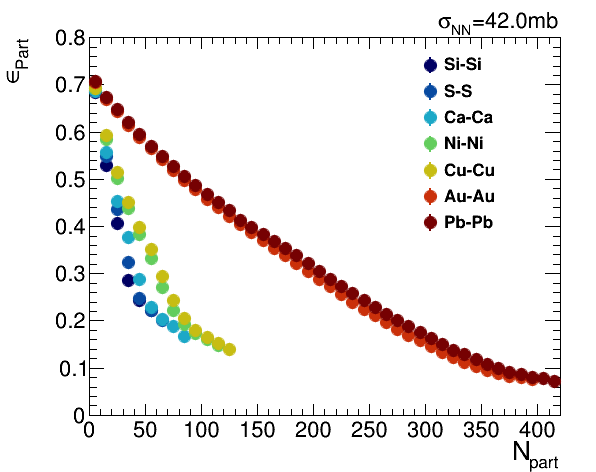

In [73]:
list_profile = []
XS_NN = '42.0'
var = 'eps_part'
varTitle = '#epsilon_{Part}'

for iSys in range(len(list(dic_histmax.keys()))):
    tmp_profile = ROOT.TProfile()
    f = ROOT.TFile(
        './plots/plot-analysis/eps-vs-Npart/Profile-' + list(
            dic_histmax.keys())[iSys] + '-' + XS_NN + '-mb.root', 'READ')
    tmp_profile = f.Get('ProfileX-'+var+'-'+list(
            dic_histmax.keys())[iSys]+'-'+XS_NN+'-mb').Clone()
    tmp_profile.SetDirectory(0)
    list_profile.append(tmp_profile)
    

c = ROOT.TCanvas('c','c',600, 500)
ROOT.gStyle.SetPalette(55)
c.cd()
ROOT.gPad.SetRightMargin(0.06)
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetBottomMargin(0.12)
ROOT.gPad.SetTopMargin(0.08)

leg = ROOT.TLegend(0.7,0.5,0.88,0.89)
list_profile[0].GetXaxis().SetTitle('N_{part}')
list_profile[0].GetYaxis().SetTitle(varTitle)
list_profile[0].GetYaxis().SetRangeUser(0,0.8)

for i in range(len(list_profile)):
    leg.AddEntry(list_profile[i], list(dic_histmax.keys())[i], 'eX0p')
    list_profile[i].SetMarkerSize(1.5)
    list_profile[i].SetLineWidth(2)
    
    if i == 0:        
        list_profile[i].Draw('PLCPMC')
    else:
        list_profile[i].Draw('SAME PLCPMC')

leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.Draw('same')

ltx = ROOT.TLatex()
ltx.SetNDC()
ltx.SetTextFont(42)
ltx.SetTextSize(0.05)
ltx.DrawLatex(0.735,0.94,'#sigma_{NN}='+XS_NN+'mb')

    
c.Draw()
c.SaveAs('./plots/plot-analysis/eps-vs-Npart/Profile_System_'+var+'-vs-Npart-XSNN'+XS_NN+'mb.png')
c.SaveAs('./plots/plot-analysis/eps-vs-Npart/Profile_System_'+var+'-vs-Npart-XSNN'+XS_NN+'mb.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./plots/plot-analysis/eps-vs-Npart/Profile_System_eps_part-vs-Npart.png has been created
Info in <TCanvas::Print>: pdf file ./plots/plot-analysis/eps-vs-Npart/Profile_System_eps_part-vs-Npart.pdf has been created


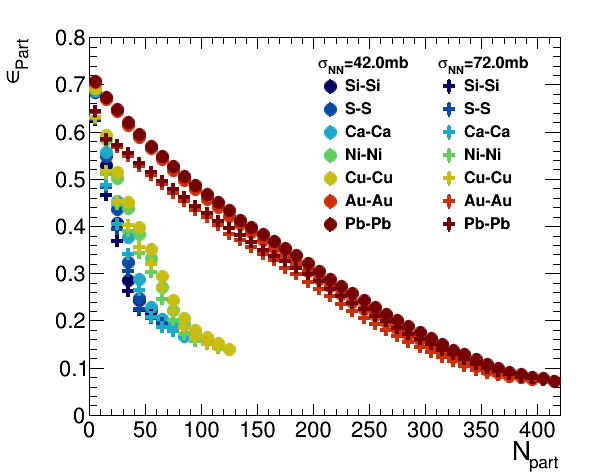

In [105]:
list_profile_42mb = []
list_profile_72mb = []

var = 'eps_part'
varTitle = '#epsilon_{Part}'

for iSys in range(len(list(dic_histmax.keys()))):
    tmp_profile = ROOT.TProfile()
    f = ROOT.TFile(
        './plots/plot-analysis/eps-vs-Npart/Profile-' + list(
            dic_histmax.keys())[iSys] + '-42.0-mb.root', 'READ')
    tmp_profile = f.Get('ProfileX-'+var+'-'+list(
            dic_histmax.keys())[iSys]+'-42.0-mb').Clone()
    tmp_profile.SetDirectory(0)
    list_profile_42mb.append(tmp_profile)
    
    
for iSys in range(len(list(dic_histmax.keys()))):
    tmp_profile = ROOT.TProfile()
    f = ROOT.TFile(
        './plots/plot-analysis/eps-vs-Npart/Profile-' + list(
            dic_histmax.keys())[iSys] + '-72.0-mb.root', 'READ')
    tmp_profile = f.Get('ProfileX-'+var+'-'+list(
            dic_histmax.keys())[iSys]+'-72.0-mb').Clone()
    tmp_profile.SetDirectory(0)
    list_profile_72mb.append(tmp_profile)

    

c = ROOT.TCanvas('c','c',600, 500)
ROOT.gStyle.SetPalette(55)
c.cd()
ROOT.gPad.SetRightMargin(0.06)
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetBottomMargin(0.12)
ROOT.gPad.SetTopMargin(0.08)

leg = ROOT.TLegend(0.53,0.5,0.73,0.89)
leg.SetHeader('#sigma_{NN}=42.0mb')
list_profile_42mb[0].GetXaxis().SetTitle('N_{part}')
list_profile_42mb[0].GetYaxis().SetTitle(varTitle)
list_profile_42mb[0].GetYaxis().SetRangeUser(0.0,0.8)

for i in range(len(list_profile_42mb)):
    leg.AddEntry(list_profile_42mb[i], list(dic_histmax.keys())[i], 'eX0p')
    list_profile_42mb[i].SetMarkerSize(1.5)
    list_profile_42mb[i].SetMarkerStyle(20)
    list_profile_42mb[i].SetLineWidth(2)
    
    if i == 0:        
        list_profile_42mb[i].Draw('PLCPMC')
    else:
        list_profile_42mb[i].Draw('SAME PLCPMC')

leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.Draw('same')

# [TRICK] This line must be added for the GetMarker/LineColor option to work!
c.Update()

leg2 = ROOT.TLegend(0.73,0.5,0.93,0.89)
leg2.SetHeader('#sigma_{NN}=72.0mb')
for i in range(len(list_profile_72mb)):
    leg2.AddEntry(list_profile_72mb[i], list(dic_histmax.keys())[i], 'eX0p')
    list_profile_72mb[i].SetMarkerSize(1.5)
    list_profile_72mb[i].SetMarkerStyle(34)
    list_profile_72mb[i].SetLineWidth(2)
    list_profile_72mb[i].SetMarkerColor(list_profile_42mb[i].GetLineColor())
    list_profile_72mb[i].SetLineColor(list_profile_42mb[i].GetLineColor())
    list_profile_72mb[i].Draw('SAME')

leg2.SetBorderSize(0)
leg2.SetFillStyle(0)
leg2.Draw('same')

    
c.Draw()
c.SaveAs('./plots/plot-analysis/eps-vs-Npart/Profile_System_'+var+'-vs-Npart.png')
c.SaveAs('./plots/plot-analysis/eps-vs-Npart/Profile_System_'+var+'-vs-Npart.pdf')